In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')
a = pd.read_csv(r'data-table-B2.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


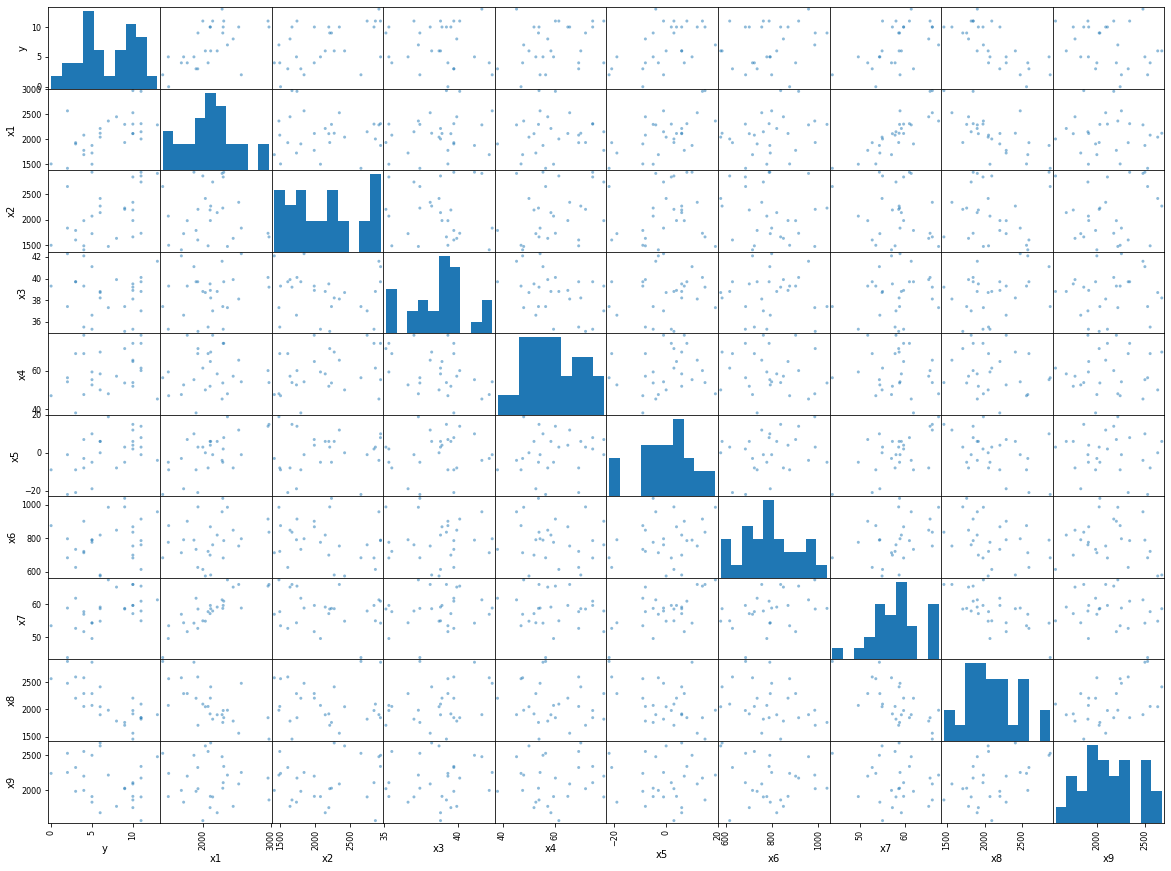

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(a, figsize=(20,15))
plt.savefig('scatter plot.jpg')

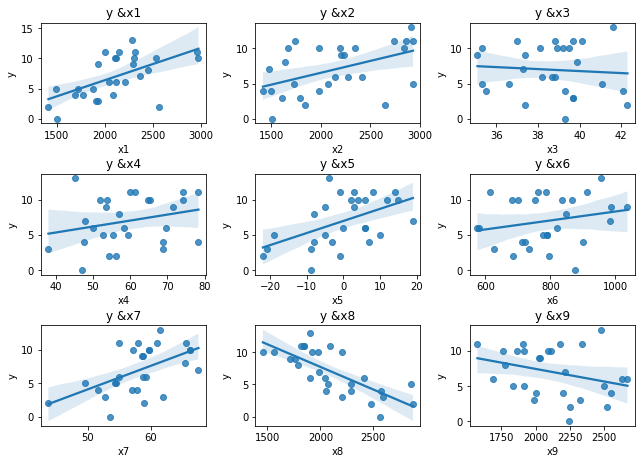

In [ ]:
#繪圖查看每個x和y的關係
import seaborn as sns

z = 1
for i in a.columns[1:]:
    plt.subplot(3, 3, z)
    aa = sns.regplot(data=a, x=i, y='y')
    aa.set_title('y &' + i)
    z = z+1
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5, 
                    wspace=0.3, 
                    hspace=0.5)

In [ ]:
'''
計算x1的R^2
from sklearn.linear_model import LinearRegression

#ax = a[['x1','x2','x3','x4','x5','x6','x7','x8','x9']]
aa = np.array(a['x1']).reshape(-1,1)
lreg = LinearRegression()
lreg.fit(aa, a['y'])
y_pred = lreg.predict(aa)

sst = np.sum((a['y']-a['y'].mean())**2)
ssr = np.sum((y_pred-a['y'].mean())**2)
rsquare = ssr/sst;rsquare   # = lreg.score(aa,a['y'])
'''

"\n計算x1的R^2\nfrom sklearn.linear_model import LinearRegression\n\n#ax = a[['x1','x2','x3','x4','x5','x6','x7','x8','x9']]\naa = np.array(a['x1']).reshape(-1,1)\nlreg = LinearRegression()\nlreg.fit(aa, a['y'])\ny_pred = lreg.predict(aa)\n\nsst = np.sum((a['y']-a['y'].mean())**2)\nssr = np.sum((y_pred-a['y'].mean())**2)\nrsquare = ssr/sst;rsquare   # = lreg.score(aa,a['y'])\n"

In [ ]:
#用迴圈計算每個變數的R^2
#ax = a[['x1','x2','x3','x4','x5','x6','x7','x8','x9']]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

r2 = []
for i in a.columns[1:]:
    aa = np.array(a[str(i)]).reshape(-1,1)
    lreg = LinearRegression()
    lreg.fit(aa, a['y'])
    y_pred = lreg.predict(aa)
    
    sst = np.sum((a['y']-a['y'].mean())**2)
    ssr = np.sum((y_pred-a['y'].mean())**2)
    rsquare = round(ssr/sst,4)    # = lreg.score(aa,a['y'])
    r2.append(rsquare)
    print((a[str(i)]).name , "的R^2=" , rsquare)
print(r2)

x1 的R^2= 0.3519
x2 的R^2= 0.233
x3 的R^2= 0.0065
x4 的R^2= 0.0668
x5 的R^2= 0.2634
x6 的R^2= 0.0502
x7 的R^2= 0.2974
x8 的R^2= 0.5447
x9 的R^2= 0.0923
[0.3519, 0.233, 0.0065, 0.0668, 0.2634, 0.0502, 0.2974, 0.5447, 0.0923]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

x1 的P-value= 0.0008770295904186533
x2 的P-value= 0.009272032949071553
x3 的P-value= 0.6826915427135647
x4 的P-value= 0.18415738911996143
x5 的P-value= 0.005223685695711218
x6 的P-value= 0.2517653826494042
x7 的P-value= 0.0026887918104564063
x8 的P-value= 7.380708841314479e-06
x9 的P-value= 0.11609132784781077
[0.00087703, 0.00927203, 0.68269154, 0.18415739, 0.00522369, 0.25176538, 0.00268879, 7.38e-06, 0.11609133]


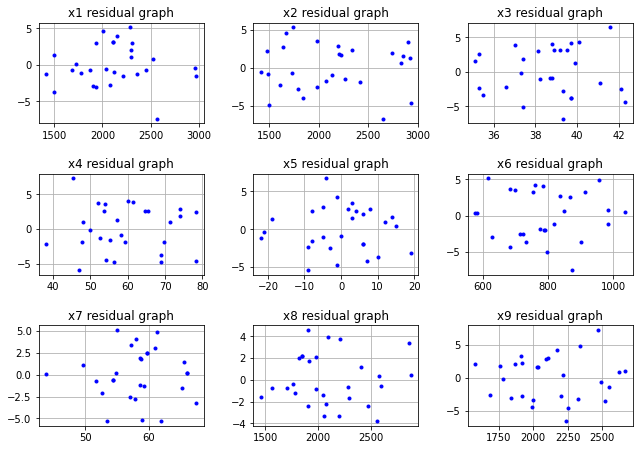

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels import stats
import scipy

z = 1
pv = []
for i in a.columns[1:]:
    y = a['y']
    x = a[str(i)]
    x = sm.add_constant(x)

    model = sm.OLS(y,x)
    results = model.fit()
    pv.append(round(results.pvalues[1],8))
    print((a[str(i)]).name , "的P-value=" , results.pvalues[1])
    #print(results.params)
    #print(results.t_test([1, 0]))
    
    res = a['y'] - results.fittedvalues
    plt.subplot(3, 3, z)
    plt.plot(a[str(i)], res, "b.")
    plt.title(i+" residual graph")
    plt.grid()
    z = z+1
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5, 
                    wspace=0.3, 
                    hspace=0.5)
print(pv)

In [ ]:
Tb = {
    "R square" : r2,
    "P-value" : pv
}

df = pd.DataFrame(Tb)
df2 = df.T  #行列轉置
colnames = {0:'x1',1:'x2',2:'x3',3:'x4',4:'x5',5:'x6',6:'x7',7:'x8',8:'x9'}
df2.rename(columns=colnames, inplace=True)
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9
R square,0.351900,0.233000,0.006500,0.066800,0.263400,0.050200,0.297400,0.544700,0.092300
P-value,0.000877,0.009272,0.682692,0.184157,0.005224,0.251765,0.002689,0.000007,0.116091


新x9的R^2= 0.0952081044768438


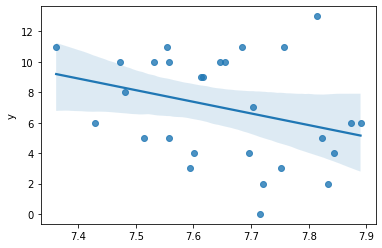

In [ ]:
#優化x9

import math

x9 = a['x9']
x9_log = []

for i in x9.index:
    x9_log.append(math.log(x9[i]))

x9_log = np.array(x9_log).reshape(-1,1)

lreg = LinearRegression()
lreg.fit(x9_log, a['y'])
y_pred_new = lreg.predict(x9_log)

predict_new = lreg.score(x9_log, a['y'])
print('新x9的R^2=',predict_new)

sns.regplot(data=a, x=x9_log, y='y')

y = a['y']
x = x9_log
x = sm.add_constant(x)
model_x9 = sm.OLS(y,x)
results_x9 = model_x9.fit()
print(results_x9)

0.5435886257603874


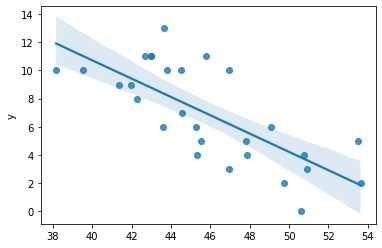

In [ ]:
#優化x8

import math

x8 = a['x8']
x8_sqrt = []

for i in x8.index:
    x8_sqrt.append(x8[i]**0.5)

x8_sqrt = np.array(x8_sqrt).reshape(-1,1)

lreg = LinearRegression()
lreg.fit(x8_sqrt, a['y'])
y_pred_new = lreg.predict(x8_sqrt)

predict_new = lreg.score(x8_sqrt, a['y'])
print(predict_new)

sns.regplot(data=a, x=x8_sqrt, y='y')

y = a['y']
x = x8_sqrt
x = sm.add_constant(x)
model_x8 = sm.OLS(y,x)
results_x8 = model_x8.fit()
print(results_x8)